In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('ggplot')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


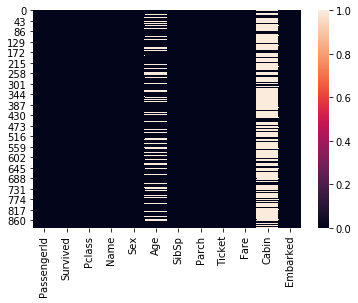

In [5]:
sns.heatmap(train.isna())

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# if null value assume that person doesn't have a cabin
train['has_cabin'] = ~train.Cabin.isnull()

In [8]:
# map sex to 0 and 1
train['sex_map'] = train.Sex.map({'male': 0, 'female': 1})

In [9]:
# combine SibSp, Parch into one column
train['fam_mem'] = train.SibSp + train.Parch

In [12]:
# drop unneeded columns
train.drop(columns=['Cabin', 'SibSp', 'Parch', 'Ticket', 'PassengerId'], inplace=True)

In [16]:
# don't need names but titles could be useful
train['Title'] = train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [18]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [19]:
train['Title'] = train['Title'].replace(['Don','Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], 'Unique')

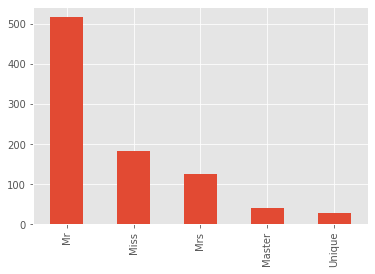

In [26]:
train['Title'].value_counts().plot(kind='bar')

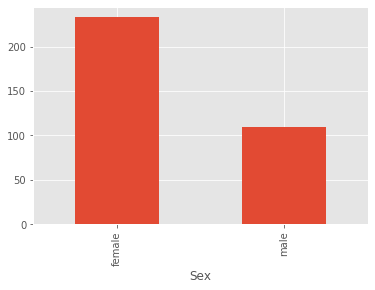

In [46]:
train.groupby('Sex')['Survived'].sum().plot(kind='bar')

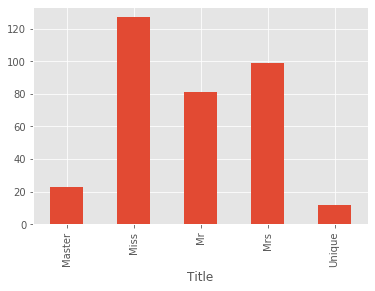

In [47]:
train.groupby('Title')['Survived'].sum().plot(kind='bar')

In [53]:
train.groupby(['Sex', 'Pclass'])['Survived'].sum()

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

In [56]:
train.drop('Name', axis=1, inplace=True)

In [60]:
train.drop('Sex', axis=1, inplace=True)

In [62]:
train.head()

,Survived,Pclass,Age,Fare,Embarked,has_cabin,sex_map,fam_mem,Title
0,0,3,22.0,7.2500,S,False,0,1,Mr
1,1,1,38.0,71.2833,C,True,1,1,Mrs
2,1,3,26.0,7.9250,S,False,1,0,Miss
3,1,1,35.0,53.1000,S,True,1,1,Mrs
4,0,3,35.0,8.0500,S,False,0,0,Mr


In [63]:
fare2 = train.Fare

In [67]:
fare2min = fare2.min()

In [69]:
fare2max = fare2.max()

In [72]:
fare2r = fare2max - fare2min

In [74]:
fare22 = (fare2 - fare2min) / fare2r

In [77]:
train['Fare'] = fare22

In [78]:
train.head()

,Survived,Pclass,Age,Fare,Embarked,has_cabin,sex_map,fam_mem,Title
0,0,3,22.0,0.014151,S,False,0,1,Mr
1,1,1,38.0,0.139136,C,True,1,1,Mrs
2,1,3,26.0,0.015469,S,False,1,0,Miss
3,1,1,35.0,0.103644,S,True,1,1,Mrs
4,0,3,35.0,0.015713,S,False,0,0,Mr


In [79]:
train['Age'] = train.Age / 100

In [85]:
train['Fare'] = train.Fare.fillna(train.Fare.median())

In [86]:
train['Age'] = train.Age.fillna(train.Age.median())

In [152]:
data2 = []
for x in train['Age']:
    if x <= 0.18:
        data2.append(True)
    else:
        data2.append(False)
        
train['under_18'] = data2
        

In [153]:
final_train = pd.get_dummies(train, drop_first=True)

In [154]:
final_train.head()

,Survived,Pclass,Age,Fare,has_cabin,sex_map,fam_mem,under_18,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,0,3,0.22,0.014151,False,0,1,False,0,1,0,1,0,0
1,1,1,0.38,0.139136,True,1,1,False,0,0,0,0,1,0
2,1,3,0.26,0.015469,False,1,0,False,0,1,1,0,0,0
3,1,1,0.35,0.103644,True,1,1,False,0,1,0,0,1,0
4,0,3,0.35,0.015713,False,0,0,False,0,1,0,1,0,0


In [150]:
def clean_data(data):
    data['has_cabin'] = ~data.Cabin.isnull()
    data['sex_map'] = data.Sex.map({'male': 0, 'female': 1})
    data.drop(columns=['Cabin', 'SibSp', 'Parch', 'Ticket', 'PassengerId'], inplace=True)
    data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
    data['Title'] = data['Title'].replace(['Don','Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], 'Unique')
    data.drop('Name', axis=1, inplace=True)
    data.drop('Sex', axis=1, inplace=True)
    fare3 = data['Fare']
    fare23 = (fare3 - fare2min) / fare2r
    data['Fare'] = fare23
    data['Age'] = data.Age / 100
    data['Fare'] = data.Fare.fillna(data.Fare.median())
    data['Age'] = data.Age.fillna(data.Age.median())
    data2 = []
    for x in train['Age']:
        if x <= 0.18:
            data2.append(True)
        else:
            data2.append(False)
        
    train['under_18'] = data2
    return pd.get_dummies(data)
    

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
y = final_train['Survived']

In [155]:
X = final_train.drop('Survived', axis=1)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [157]:
from sklearn.neural_network import MLPClassifier

In [171]:
mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=[50, 50], alpha=0.1, random_state=42)

In [172]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[50, 50], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [173]:
print("Training set score: {}".format(mlp.score(X_train, y_train)))
print("Test set score: {}".format(mlp.score(X_test, y_test)))

Training set score: 0.8547904191616766
Test set score: 0.8430493273542601


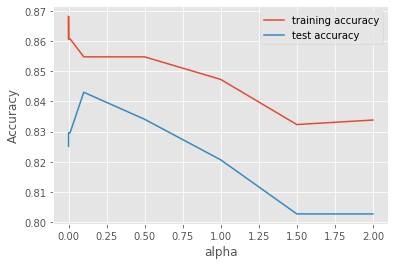

In [167]:
training_accuracy = []
test_accuracy = []

#try alpha 0.01 to 10
alpha_settings = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

for n_alpha in alpha_settings:
    mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=[50,50], alpha=n_alpha, random_state=42)
    mlp.fit(X_train, y_train)
    training_accuracy.append(mlp.score(X_train, y_train))
    test_accuracy.append(mlp.score(X_test, y_test))
    
    
plt.plot(alpha_settings, training_accuracy, label='training accuracy')
plt.plot(alpha_settings, test_accuracy, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('alpha')
plt.legend()